In [72]:
import requests
import json
import pandas as pd
from shapely.geometry import shape, GeometryCollection,mapping
from shapely.ops import polylabel

In [5]:
url =   "https://macrostrat.org/api/v2/columns?project_id=10&format=geojson_bare&status_code=in%20process"


In [6]:
res = requests.get(url)
data = res.json()

In [7]:
data.keys()

dict_keys(['type', 'features'])

In [75]:
# turn multipolygon into polygon and share the features
test_multipolygon = data['features'][0]
multi_props = {"type":test_multipolygon['type'], "properties":test_multipolygon['properties']}

mult_shape = shape(test_multipolygon['geometry']).buffer(0)

polygons3 = []
for polygon in mult_shape:
    polygons3.append(polygon)
new_features = []
for poly in polygons3:
    new_feature = {**multi_props}
    new_feature['geometry'] = mapping(poly)
    new_features.append(new_feature)
print(len(new_features))

2


In [37]:
for indx, feature in reversed(list(enumerate(data['features']))):
    shape_ = shape(feature['geometry']).buffer(0)


polygons = [shape(feature["geometry"]).buffer(0) for feature in data['features']]
len(polygons)

212

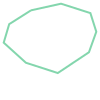

In [53]:
polygons2 = []
for pol in polygons:
    if pol.type == "MultiPolygon":
        for poll in pol:
            polygons2.append(poll)
    else:
        polygons2.append(pol)
polygons2[0].interiors[0]

In [39]:
poly_labels = [polylabel(pol, tolerance=10) for pol in polygons2]
len(poly_labels)

265

POINT (-52.93641254110201 47.40178013044228)


In [42]:
new_data = []
for ele in data['features']:
    obj = {}
    obj['project_id'] = ele['properties']['project_id']
    obj['col_id'] = ele['properties']['col_id']
    obj['col_name'] = ele['properties']['col_name']
    obj['col_group'] = ele['properties']['col_group']
    obj["location"] = ele['geometry']
    new_data.append(obj)

In [43]:
with open("project_10.json", "w") as f:
    json.dump(new_data, f)

In [24]:
new_data[-1]

{'project_id': 10,
 'col_id': 5725,
 'col_name': 'Peary Land, NE Greenland',
 'col_group': 'Eastern Laurentia margin: Franklinian Basin, Ellesmerian Orogen Uplift, Caledonide Orogen uplift',
 'location': {}}

In [86]:
test = ['a','b','c','d','e']
for indx,val in enumerate(test):
    print(indx, val)
print("")
for indx, val in reversed(list(enumerate(test))):
    print(indx, val)

0 a
1 b
2 c
3 d
4 e

4 e
3 d
2 c
1 b
0 a
